## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import zipfile as zf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [4]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
movie_gross.isna().sum()

#Since there are only 5 films out of 3,387 that are missing a studio, we are going to drop those from our dataset. 
#Additionally, we are going to drop the 28 films that are missing a domestic gross.

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
movie_cleaned = movie_gross.dropna(subset=['studio', 'domestic_gross'])
movie_cleaned.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [16]:
#Change foreign gross from object to integer
#movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].astype('float')
#movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].fillna(0).astype(float)

movie_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [18]:
movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].fillna(0)

movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].str.replace(',', '')
movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].astype(float)

<ipython-input-18-8073a48d9429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].fillna(0)
<ipython-input-18-8073a48d9429>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaned['foreign_gross'] = movie_cleaned['foreign_gross'].str.replace(',', '')
<ipython-input-18-8073a48d9429>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [19]:
movie_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


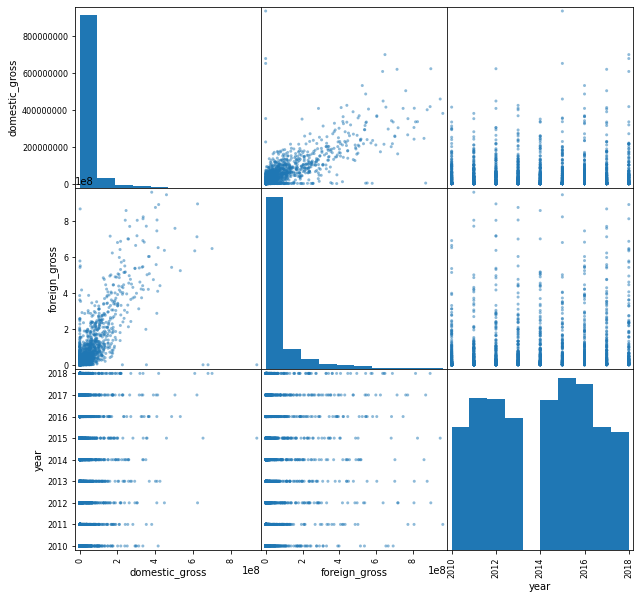

In [20]:
pd.plotting.scatter_matrix(movie_cleaned, figsize=(10,10));

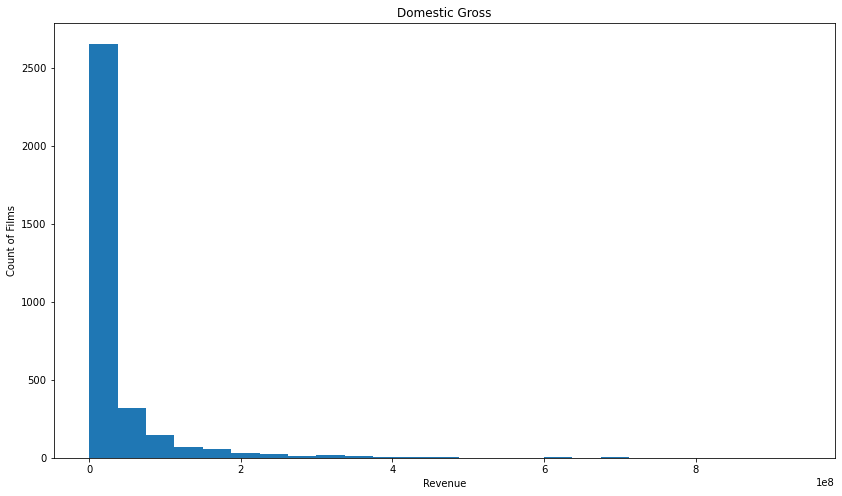

In [40]:
fig, ax = plt.subplots(figsize=(14,8))

ax.hist(movie_cleaned['domestic_gross'], bins = 25)
plt.title("Domestic Gross")
plt.xlabel("Revenue")
plt.ylabel('Count of Films');

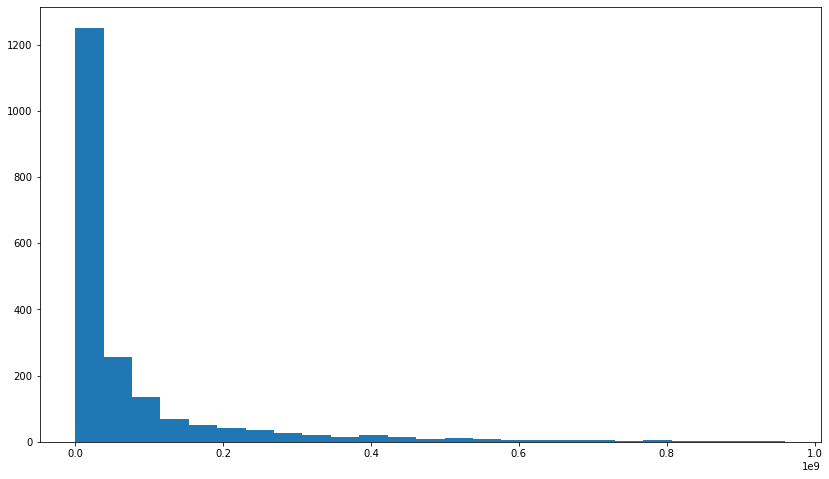

In [35]:
fig, ax = plt.subplots(figsize=(14,8))

ax.hist(movie_cleaned['foreign_gross'], bins = 25);